### Import

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

### Fake Data

In [5]:
nPoints = 50
maxDistance = 0.35
X = (np.random.random((nPoints,2))-0.5)*1.5
X[0,:] = 0
Dm = squareform(pdist(X))

### Create Graph

In [6]:
G = {}
for i in range(nPoints):
    for j in range(nPoints):
        if (i != j):
            distance = Dm[i,j]
            if (distance < maxDistance):
                if i in G:
                    edges = G[i]
                    edges.append(j)
                    G[i] = edges
                else:
                    G[i] = [j]

### Plot Graph

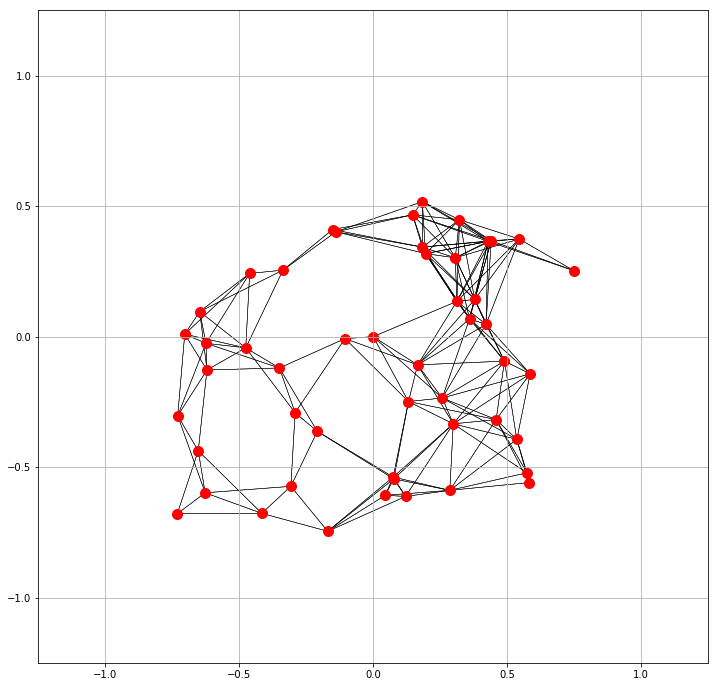

In [7]:
plt.figure(figsize=(12,12))
for node in G:
    for edge in G[node]:
        x1 = X[node,0]
        y1 = X[node,1]
        x2 = X[edge,0]
        y2 = X[edge,1]
        plt.plot([x1,x2],[y1,y2],c='k',linewidth=0.5,zorder=0)
plt.scatter(X[:,0],X[:,1],c='r',s=100,zorder=1)
plt.axis((-1.25,1.25,-1.25,1.25));
plt.grid()

### Nodes furthest apart

In [42]:
startNode,endNode = np.unravel_index(np.argmax(Dm),Dm.shape)

### Dijkstra

In [47]:
P = {}
Q = []
V = np.zeros(nPoints)
D = np.zeros(nPoints) + -np.inf
D[startNode] = 0
Q.append((startNode,0))


while (len(Q) > 0):    

    #Pop the first node
    node,weight = Q[0]
    Q = Q[1:]

    #For each edge in the node
    for edge in G[node]:
        weight = Dm[node,edge]
        if (D[edge] < D[node] + weight):
            D[edge] = D[node] + weight
            P[edge] = node
            Q.append((edge,weight))
            


KeyboardInterrupt: 

### Get Path

In [ ]:
found = False
Path = []
Path.append(endNode)
while (endNode in P and found == False):
    endNode = P[endNode]
    Path.append(endNode)
Path 

### Plot

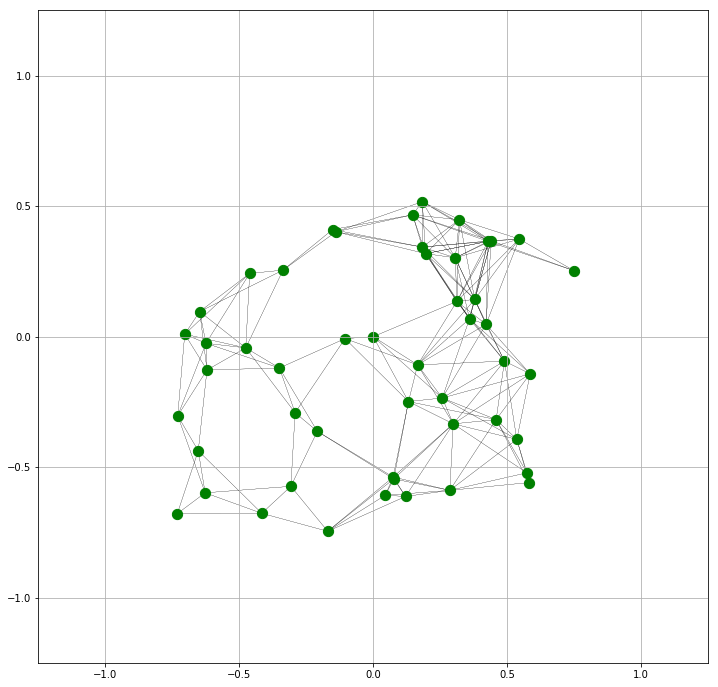

In [45]:
plt.figure(figsize=(12,12))
for node in G:
    for edge in G[node]:
        x1 = X[node,0]
        y1 = X[node,1]
        x2 = X[edge,0]
        y2 = X[edge,1]
        plt.plot([x1,x2],[y1,y2],c='k',linewidth=0.15,zorder=0)
plt.scatter(X[:,0],X[:,1],c='g',s=105,zorder=1)
for i in range(len(Path)-1):
    node = Path[i]
    edge = Path[i+1]
    x1 = X[node,0]
    y1 = X[node,1]
    x2 = X[edge,0]
    y2 = X[edge,1]
    plt.plot([x1,x2],[y1,y2],c='r',linewidth=2,zorder=2)
plt.axis((-1.25,1.25,-1.25,1.25));
plt.grid()

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,  0., inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])